In [228]:
%matplotlib inline
import pandas as pd ; import numpy as np
import matplotlib.pyplot as plt ; import seaborn as sns

def age_to_days(l):
    l = str(l).split(" ")
    if l[0] == 'nan':
        return np.nan
    elif 'day' in l[1]:
        return int(l[0])
    elif 'week' in l[1]:
        return int(l[0])*7
    elif 'month' in l[1]:
        return int(l[0])*30
    elif 'year' in l[1]:
        return int(l[0])*365

data = pd.read_csv("train.csv")
data["DateTime"] = pd.to_datetime(data["DateTime"])
data["AgeuponOutcome"] = data["AgeuponOutcome"].map(lambda x: age_to_days(x));
data["AgeuponOutcome"] = data["AgeuponOutcome"].map(lambda x: float(x)/np.max(data["AgeuponOutcome"]))
data["SexuponOutcome"] = data["SexuponOutcome"].map(lambda x: 0 if 'Male' in str(x) else 1)
data["AnimalType"] = data["AnimalType"].map(lambda x: 0 if 'Dog' in str(x) else 1)

bad_outcomes = ['Died', 'Euthanasia']

data["Outcome"] = data["OutcomeType"].map(lambda x: 1 if str(x) in bad_outcomes else 0)
data = data[data["AnimalType"] == 1]
colours_dic = dict(data["Color"].value_counts())
data['bigEnough'] = data["Color"].map(lambda x: 1 if colours_dic[x] > 500 else 0)
data = data[data['bigEnough'] == 1 ]

In [229]:
a = data[["Outcome","Color"]].groupby(["Color"]).aggregate(lambda x : np.sum(x)/float(len(x)))
a["SampleSize"] = (data[["Outcome","Color"]].groupby(["Color"]).aggregate(lambda x : float(len(x))))["Outcome"]


In [221]:
#data["OutcomeType"].unique()

array(['Transfer', 'Euthanasia', 'Adoption', 'Return_to_owner', 'Died'], dtype=object)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


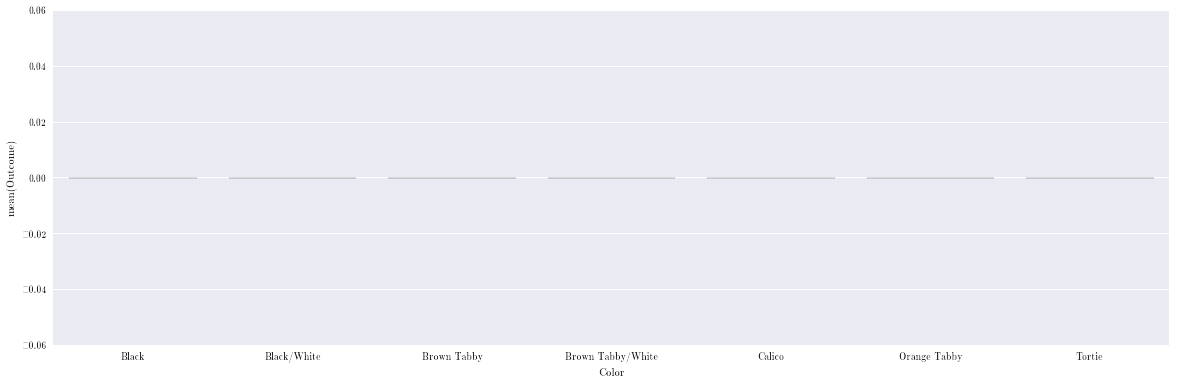

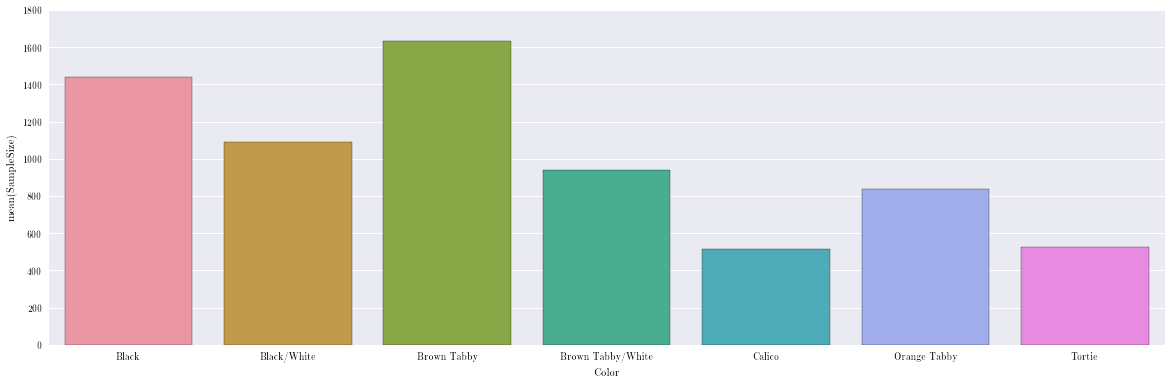

In [230]:
plt.figure(figsize=(20,6))
sorted_a = a.sort(columns="Outcome",ascending=False)
sns.barplot(x=sorted_a.index,y="Outcome",data = sorted_a)
plt.figure(figsize=(20,6))
sns.barplot(x=sorted_a.index,y="SampleSize",data = sorted_a)